# Introdução a NLTK

Neste notebook vamos ver algumas funções básicas do NLTK para trabalhar com textos.

Vamos começar importando um dos muitos livros que estão disponíveis dentro do *próprio NLTK*: Dom Casmurro, do Machado de Assis. Para isso basta seguir essas linhas de código:



In [ ]:
import nltk
nltk.download('machado')

[nltk_data] Downloading package machado to /root/nltk_data...


True

In [ ]:
from nltk.corpus import machado
machado.fileids()

#vamos guardá-lo na variável 'text'
text = machado.raw('romance/marm08.txt')

Vamos já pré-processar o texto, para já facilitar todas as funções e métodos que vamos aplicar:

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
def pre_processamento(texto):
    """
    Função para selecionar apenas as letras do texto e remover stopwords
    Input: texto para ser pré-processado (string)
    Output: texto limpo (string)
    """
    letras =  re.findall(r'\b[A-zÀ-úü]+\b', text.lower())
    #Remover stopwords
    stopwords = nltk.corpus.stopwords.words('portuguese')
    #Adicionando stopwords que não estão na lista do nltk 
    stop = set(stopwords)

    meaningful_words = [w for w in letras if w not in stop]
    meaningful_words_string = " ".join(meaningful_words)

    return meaningful_words_string

In [ ]:
texto_limpo = pre_processamento(text)

## Contando vocabulário

Vamos ver algumas funções que ajudam a contar palavras num texto:

In [ ]:
# contagem de palavras
len(text)

373504

In [ ]:
# contagem de palavras específicas
text.count('Capitu') # aqui vemos que Capitu aparece 338 vezes dentro do romance

338

In [ ]:
# porcentagem de um texto que é ocupado por determinada palavra
100 * text.count('Capitu') / len(text)

0.09049434544208362

In [ ]:
# diversidade lexical
def lexical_diversity(texto):
    return len(set(texto)) / len(texto)

lexical_diversity(texto_limpo)

0.00015865138189421614

## Stopwords

Como vocês já devem saber, stopwords são palavras consideradas "inutéis" para o computador processar e interpretar um texto. 

Vamos printar as stopwords do português:

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

#printando quais são as stopwords do português
stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

In [ ]:
# função para ver a porcentagem de palavras do texto que não estão em stopwords
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('portuguese')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content) / len(text)

In [ ]:
content_fraction(text)

0.7187232265250172

## Explorando o Texto 
### Frequência das palavras 

Podemos usar o FreqDist do NLTK para ver a quantidade de vezes que uma palavra aparece em um texto, ou seja, a frequência das palavras. No caso, se você não realizar nenhum pré-processamento, as palavras mais comuns serão pontuações e stopwords. 

In [ ]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
nltk.download('punkt')

tokens = word_tokenize(texto_limpo)
fd = FreqDist(tokens)
fd.most_common(20)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('capitu', 341),
 ('mãe', 229),
 ('dias', 192),
 ('tudo', 189),
 ('capítulo', 188),
 ('disse', 184),
 ('casa', 170),
 ('ser', 168),
 ('olhos', 164),
 ('mim', 162),
 ('josé', 160),
 ('assim', 158),
 ('vez', 147),
 ('agora', 146),
 ('ainda', 141),
 ('outra', 138),
 ('nada', 135),
 ('lo', 127),
 ('tão', 122),
 ('tempo', 120)]

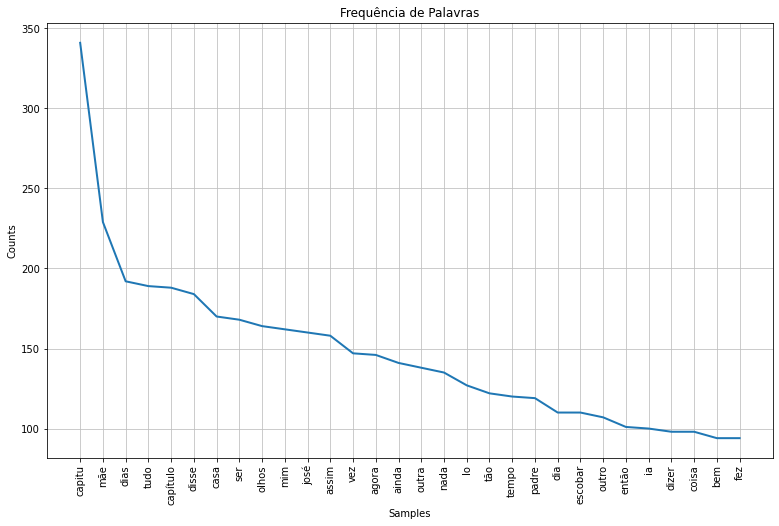

In [ ]:
import matplotlib.pyplot as plt
tokens_limpo = word_tokenize(texto_limpo)
frequencia = FreqDist(tokens_limpo)
plt.figure(figsize = (13, 8))
frequencia.plot(30, title = "Frequência de Palavras")

In [ ]:
# vamos ver a frequência da palavra 'amor'
frequencia['amor']

20

### Concordância

Essa função serve para nos mostrar em quais contextos determinada palavra de nossa escolha aparece. Isso é feito colando a palavra no centro do seu "contexto", ou seja, do texto onde aparece.

Vamos ver:




In [ ]:
dom_casmurro = nltk.Text(word_tokenize(texto_limpo))
dom_casmurro.concordance('capitu')

Displaying 25 of 341 matches:
asta idade bentinho mal quinze anos capitu fez quatorze semana passada dois cr
oisa brincadeira arranjávamos altar capitu servia sacristão alterávamos ritual
e viva ar mesma opinião então amava capitu capitu mim realmente andava cosido 
ar mesma opinião então amava capitu capitu mim realmente andava cosido saias o
retanto matéria conversações sempre capitu chamava vezes bonito mocetão flor o
indíssimos fazer dizia lindos então capitu abanava cabeça grande expressão des
ia alguma frase algum gesto contava capitu dia notou diferença dizendo bonitos
fenômeno recente acordar pensamento capitu escutá la memória estremecer ouvia 
ndade demais virtudes eternas amava capitu capitu amava pernas andavam desanda
emais virtudes eternas amava capitu capitu amava pernas andavam desandavam est
ralmente ser primeira capítulo xiii capitu repente ouvi bradar voz dentro casa
ente ouvi bradar voz dentro casa pé capitu quintal mamãe outra vez casa vem cá
orta comunicação manda

### Similaridade 


In [ ]:
dom_casmurro.similar('mãe')

mim falou tanto bolso outra assim fim papel seminário morreu estudante
importa súplicas saí


### Collocations

Collocations são expressões de multiplas palavras que podem ocorrer comumente. De forma mais clara, são apenas formas de encontrar bigramas em um texto.

Apenas para relembrar: Bigramas são palavras que tendem a ocorrer mais vezes estando **juntas**, ou seja, elas até podem ocorrer separadas, mas é mais comum que apareçam juntas em um texto. Por exemplo, as palavras 'rio' e 'janeiro' são palavras com sentidos independentes, mas quando se diz respeito a cidade, ocorrem juntas, porque juntas elas possuem um **significado**.

In [ ]:
dom_casmurro.collocations() 

josé dias; prima justina; tio cosme; mata cavalos; padre cabral; pode
ser; outra vez; alguma coisa; alguns instantes; outra coisa; muita
vez; dia seguinte; engenho novo; rio janeiro; dom casmurro;
protonotário apostólico; tique tique; ser padre; ave marias; mana
glória


## Gráfico de Dispersão

Com um gráfico de dispersão podemos determinar o local de aparição de uma palavra em um texto, desde o começo até o final. Cada faixa (stripe) representa uma aparição de uma palavra e cada linha (row) representa o texto inteiro.


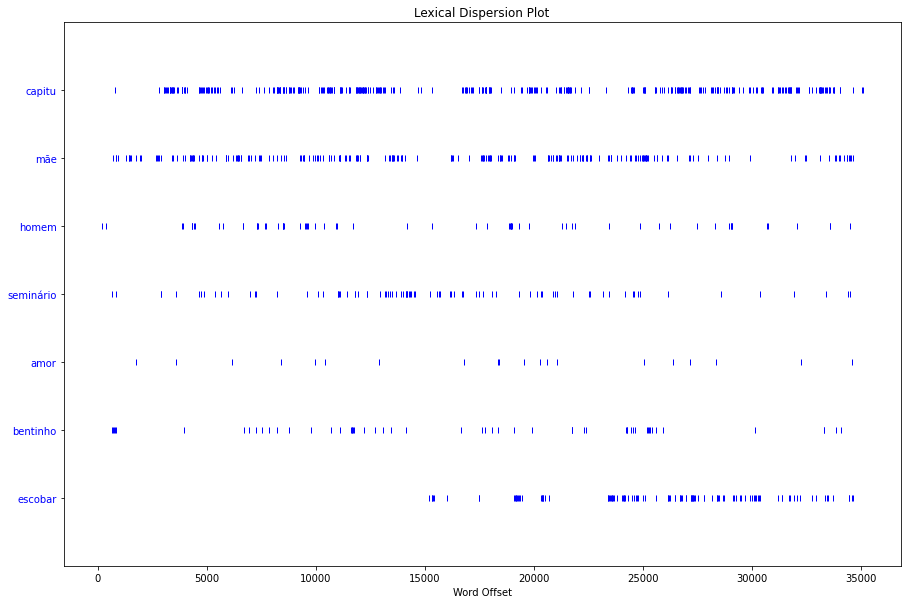

In [ ]:
plt.figure(figsize=(15, 10))
dom_casmurro.dispersion_plot(['capitu', 'mãe', 'homem', 'seminário', 'amor', 'bentinho', 'escobar'])

## Swadesh

Essa é uma ferramente construída com palavras de determinada língua com sua equivalência em outra língua. Você escolhe as línguas que deseja e isso gera um dicionário com as palavras equivalentes de cada língua, entetanto são poucas palavras (no português são umas 200 só). 

In [ ]:
from nltk.corpus import swadesh
nltk.download('swadesh')

[nltk_data] Downloading package swadesh to /root/nltk_data...
[nltk_data]   Unzipping corpora/swadesh.zip.


True

In [ ]:
pt2en = swadesh.entries(['pt', 'en'])

In [ ]:
pt2en

[('eu', 'I'),
 ('tu, você', 'you (singular), thou'),
 ('ele', 'he'),
 ('nós', 'we'),
 ('vós, vocês', 'you (plural)'),
 ('eles, elas', 'they'),
 ('este, isto', 'this'),
 ('aquele, aquilo', 'that'),
 ('aqui', 'here'),
 ('lá, ali, aí', 'there'),
 ('quem', 'who'),
 ('que, o que', 'what'),
 ('onde', 'where'),
 ('quando', 'when'),
 ('como', 'how'),
 ('não', 'not'),
 ('todo', 'all'),
 ('muito', 'many'),
 ('algum', 'some'),
 ('pouco', 'few'),
 ('outro, outra', 'other'),
 ('um, uma', 'one'),
 ('dois, duas', 'two'),
 ('três', 'three'),
 ('quatro', 'four'),
 ('cinco', 'five'),
 ('grande', 'big'),
 ('longe', 'long'),
 ('largo', 'wide'),
 ('grosso, espesso', 'thick'),
 ('pesado', 'heavy'),
 ('pequeno', 'small'),
 ('curto', 'short'),
 ('estreito', 'narrow'),
 ('tênue, magro', 'thin'),
 ('mulher', 'woman'),
 ('homem', 'man (adult male)'),
 ('homem', 'man (human being)'),
 ('criança, filho', 'child'),
 ('esposa, mulher', 'wife'),
 ('esposo, marido', 'husband'),
 ('mãe', 'mother'),
 ('pai', 'father'),


Podemos construir um mini "tradutor" usando o swadesh:

In [ ]:
translate = dict(pt2en)

In [ ]:
lista_palavras = ['sol', 'lua']

for i in lista_palavras:
    print(translate[i])

sun
moon


## Sentidos e Sinônimos com WordNet

WordNet é um dicionário de inglês orientado para a semântica. O NLTK inclui o WordNet em inglês, com 155.287 palavras e 117.659 conjuntos de sinônimos. Começaremos examinando os sinônimos e como eles são acessados ​​no WordNet:



In [ ]:
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# com essa função podemos ver que 'car' possui dois sentidos, de 'car' e podendo ser 'cable_car'
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [ ]:
# vamos explorar sinônimos do primeiro tipo de carro
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [ ]:
# vamos acessar a definição de 'car'
wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [ ]:
# exemplo numa frase
wn.synset('car.n.01').examples()

['he needs a car to get to work']

Podemos também acessar hipônimos, que são palavras que têm sentido mais restrito, ou seja, hipônimo é um vocábulo mais específico. Por exemplo: Observar, examinar, olhar, enxergar são hipônimos de ver.

In [ ]:
# hipônimos de car
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar

[Synset('ambulance.n.01'),
 Synset('beach_wagon.n.01'),
 Synset('bus.n.04'),
 Synset('cab.n.03'),
 Synset('compact.n.03'),
 Synset('convertible.n.01'),
 Synset('coupe.n.01'),
 Synset('cruiser.n.01'),
 Synset('electric.n.01'),
 Synset('gas_guzzler.n.01'),
 Synset('hardtop.n.01'),
 Synset('hatchback.n.01'),
 Synset('horseless_carriage.n.01'),
 Synset('hot_rod.n.01'),
 Synset('jeep.n.01'),
 Synset('limousine.n.01'),
 Synset('loaner.n.02'),
 Synset('minicar.n.01'),
 Synset('minivan.n.01'),
 Synset('model_t.n.01'),
 Synset('pace_car.n.01'),
 Synset('racer.n.02'),
 Synset('roadster.n.01'),
 Synset('sedan.n.01'),
 Synset('sport_utility.n.01'),
 Synset('sports_car.n.01'),
 Synset('stanley_steamer.n.01'),
 Synset('stock_car.n.01'),
 Synset('subcompact.n.01'),
 Synset('touring_car.n.01'),
 Synset('used-car.n.01')]

De forma semelhante, podemos ver hiperônimos, que é uma palavra que pertence ao mesmo campo semântico de outra mas com o sentido mais abrangente, podendo ter várias possibilidades para um único hipônimo. Por exemplo, a palavra flor está associada a todos os tipos de flores: rosa, dália, violeta, etc.

In [ ]:
motocar_hyper = motorcar.hypernyms()
motocar_hyper

[Synset('motor_vehicle.n.01')]

In [ ]:
#o maior hiperparâmetro possível
motorcar.root_hypernyms()

[Synset('entity.n.01')]

## Normalizando o Texto - Stemmatizando e Lemmatizando

Como vocês já sabem, stemmatizar e lemmatizar um texto é diminuir algumas palavras para sua raiz. A diferença, entretanto, é que ao lemmatizar você realmente reduz a palavra a sua raiz, o que pode levar bastante tempo, e ao stemmatizar as palavras são só cortadas, o que pode gerar palavras que não existem.

In [ ]:
#stemmatizando com Porter
porter = nltk.PorterStemmer()
[porter.stem(t) for t in tokens]

In [ ]:
#stemmatizando com Lancaster
lancaster = nltk.LancasterStemmer()
[lancaster.stem(t) for t in tokens]

In [ ]:
#Lemmatizando
wnl = nltk.WordNetLemmatizer()
[wnl.lemmatize(t) for t in tokens]

# Modelagem com NLTK

![alt text](https://www.nltk.org/images/supervised-classification.png)

In [ ]:
import random
import nltk
from nltk.corpus import names
nltk.download('names')
nltk.corpus.names.fileids()

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


['female.txt', 'male.txt']

## Um classificador simplificado

In [ ]:
# labels / dataset
labeled_names = [(name, 'male') for name in names.words('male.txt')] + \
                [(name, 'female') for name in names.words('female.txt')]
random.shuffle(labeled_names)

In [ ]:
# features function generator
def gender_features(word):
    return {
      'last_letter': word[-1]
    }
gender_features('Shrek')

{'last_letter': 'k'}

In [ ]:
def create_dataset(function):
    # creating dataset
    feature_set = [(function(name), gender) for (name, gender) in labeled_names]
    # train test split
    train_set, test_set = feature_set[500:], feature_set[:500]
    return train_set, test_set

In [ ]:
train_set

[({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'y'}, 'female'),
 ({'last_letter': 'l'}, 'male'),
 ({'last_letter': 'm'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 't'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'm'}, 'male'),
 ({'last_letter': 'r'}, 'female'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'y'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'y'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'o'}, 'female'),
 ({'last_letter': 'i'}, 'female'),
 ({'last_letter': 'e'}, 'male'),
 

In [ ]:
train_set, test_set = create_dataset(gender_features)

clf = nltk.NaiveBayesClassifier.train(train_set) # class method 
print(nltk.classify.accuracy(clf, test_set))

0.76


In [ ]:
clf.show_most_informative_features()

Most Informative Features
             last_letter = 'a'            female : male   =     36.6 : 1.0
             last_letter = 'k'              male : female =     32.4 : 1.0
             last_letter = 'f'              male : female =     16.0 : 1.0
             last_letter = 'p'              male : female =     12.6 : 1.0
             last_letter = 'v'              male : female =     11.2 : 1.0
             last_letter = 'd'              male : female =      9.7 : 1.0
             last_letter = 'm'              male : female =      8.8 : 1.0
             last_letter = 'o'              male : female =      8.5 : 1.0
             last_letter = 'z'              male : female =      7.2 : 1.0
             last_letter = 'r'              male : female =      6.8 : 1.0


## Aprimorando o classificador

In [ ]:
def gender_features_plus(name):
    features = {}
    features['first_letter'] = name[0].lower()
    features['last_letter'] = name[-1].lower()
    features['last_two_letters'] = name[-2:].lower()
    features['last_three_letters'] = name[-3:].lower()
        for letter in 'abcdefghijklmnopqrstuvwxyz':
            features[f"count({letter})"] = name.lower().count(letter)
            features[f"has({letter})"] = 1 if letter in name.lower() else 0
    return features
print(gender_features_plus('Shrek'))

{'first_letter': 's', 'last_letter': 'k', 'last_two_letters': 'ek', 'last_three_letters': 'rek', 'count(a)': 0, 'has(a)': 0, 'count(b)': 0, 'has(b)': 0, 'count(c)': 0, 'has(c)': 0, 'count(d)': 0, 'has(d)': 0, 'count(e)': 1, 'has(e)': 1, 'count(f)': 0, 'has(f)': 0, 'count(g)': 0, 'has(g)': 0, 'count(h)': 1, 'has(h)': 1, 'count(i)': 0, 'has(i)': 0, 'count(j)': 0, 'has(j)': 0, 'count(k)': 1, 'has(k)': 1, 'count(l)': 0, 'has(l)': 0, 'count(m)': 0, 'has(m)': 0, 'count(n)': 0, 'has(n)': 0, 'count(o)': 0, 'has(o)': 0, 'count(p)': 0, 'has(p)': 0, 'count(q)': 0, 'has(q)': 0, 'count(r)': 1, 'has(r)': 1, 'count(s)': 1, 'has(s)': 1, 'count(t)': 0, 'has(t)': 0, 'count(u)': 0, 'has(u)': 0, 'count(v)': 0, 'has(v)': 0, 'count(w)': 0, 'has(w)': 0, 'count(x)': 0, 'has(x)': 0, 'count(y)': 0, 'has(y)': 0, 'count(z)': 0, 'has(z)': 0}


In [ ]:
train_set, test_set = create_dataset(gender_features_plus)

clf = nltk.NaiveBayesClassifier.train(train_set) # class method 
y_hat = clf.predict(test_set)
#print(nltk.classify.accuracy(clf, test_set))

In [ ]:
from sklean.metrics import confusion_matrix
confusion

In [ ]:
clf.show_most_informative_features()

Most Informative Features
        last_two_letters = 'na'           female : male   =     98.1 : 1.0
        last_two_letters = 'la'           female : male   =     73.5 : 1.0
        last_two_letters = 'ia'           female : male   =     39.5 : 1.0
             last_letter = 'a'            female : male   =     36.6 : 1.0
        last_two_letters = 'sa'           female : male   =     35.2 : 1.0
             last_letter = 'k'              male : female =     32.4 : 1.0
        last_two_letters = 'us'             male : female =     27.5 : 1.0
        last_two_letters = 'ra'           female : male   =     27.2 : 1.0
        last_two_letters = 'do'             male : female =     25.1 : 1.0
        last_two_letters = 'rd'             male : female =     24.7 : 1.0


## Sentence Segmentation

In [ ]:
nltk.download('treebank')
nltk.download('punkt')
sents = nltk.corpus.treebank_raw.sents()

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
tokens = []
boundaries = set()
offset = 0
for sent in sents:
    tokens.extend(sent)
    offset += len(sent)
    boundaries.add(offset-1)

In [ ]:
def punct_features(tokens, i):
    return {
      'next-word-capitalized': tokens[i+1][0].isupper(),
      'prev-word': tokens[i-1].lower(),
      'punct': tokens[i],
      'prev-word-is-one-char': len(tokens[i-1]) == 1
    }

In [ ]:
featuresets = [(punct_features(tokens, i), (i in boundaries)) for i in range(1, len(tokens)-1) if tokens[i] in '.?!']
featuresets[:5]

[({'next-word-capitalized': False,
   'prev-word': 'nov',
   'prev-word-is-one-char': False,
   'punct': '.'},
  False),
 ({'next-word-capitalized': True,
   'prev-word': '29',
   'prev-word-is-one-char': False,
   'punct': '.'},
  True),
 ({'next-word-capitalized': True,
   'prev-word': 'mr',
   'prev-word-is-one-char': False,
   'punct': '.'},
  False),
 ({'next-word-capitalized': True,
   'prev-word': 'n',
   'prev-word-is-one-char': True,
   'punct': '.'},
  False),
 ({'next-word-capitalized': False,
   'prev-word': 'group',
   'prev-word-is-one-char': False,
   'punct': '.'},
  True)]

In [ ]:
size = int(len(featuresets) * 0.1)
train_set, test_set = featuresets[size:], featuresets[:size]
classifier = nltk.NaiveBayesClassifier.train(train_set)
nltk.classify.accuracy(classifier, test_set)

0.936026936026936